In [2]:
import numpy as np
from numpy import linalg as LA

In [10]:
m, n = 3, 4
A = np.random.randn(m, n)
U, S, V = LA.svd(A)  # A = U * S * V

# checking if U, V are orthogonal(trực giao) and S is a diagonal matrix with nonnegative decreasing elements
print('Frobenius norm of (UU^T - I) =', LA.norm(U.dot(U.T) - np.eye(m)))
print('S = ', S)
print('Frobenius norm of (VV^T - I) =', LA.norm(V.dot(V.T) - np.eye(n)))


Frobenius norm of (UU^T - I) = 5.086964687122577e-16
S =  [1.73288825 1.30918213 0.72808527]
Frobenius norm of (VV^T - I) = 6.650435145123327e-16


# Image compression

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

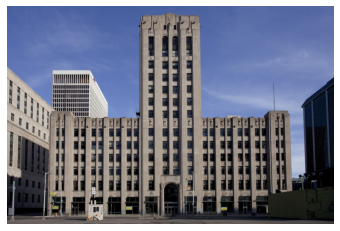

In [5]:
img = mpimg.imread('building2.JPG')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

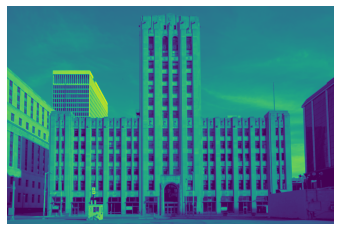

In [6]:
# to gray 
gray = 0.2125* img[:, :, 0] + 0.7154 *img[:, :, 1] + 0.0721 *img[:, :, 2]
plt.imshow(gray)
plt.axis('off')
plt.show()

In [7]:
U, S, V = LA.svd(gray) 

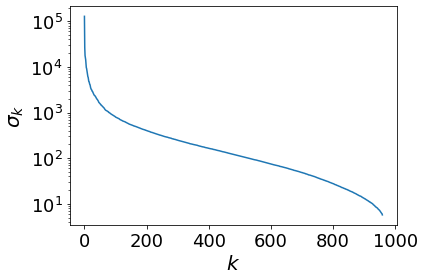

In [9]:
# from matplotlib.backends.backend_pdf import PdfPages
# with PdfPages('singular_value.pdf') as pdf:
plt.semilogy(S) 
plt.xlabel('$k$', fontsize = 20)
plt.ylabel('$\sigma_k$', fontsize = 20)
# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', labelsize=18)
plt.tight_layout()
# pdf.savefig()
plt.show()

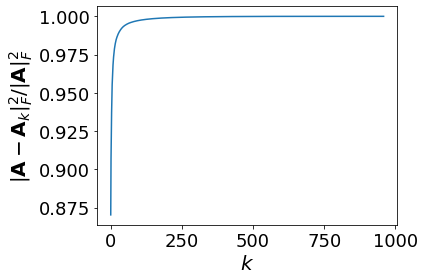

In [10]:
# percentage of preserving energy

# with PdfPages('energy_preserved.pdf') as pdf:
a = np.sum(S**2)
b = np.zeros_like(S)
for i in range(S.shape[0]):
    b[i] = np.sum(S[:i+1]**2, axis = 0)/a

plt.plot(b)
plt.xlabel('$k$', fontsize = 20)
plt.ylabel('$\|\mathbf{A} - \mathbf{A}_k\|_F^2 / \|\mathbf{A}\|_F^2$', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout()
# pdf.savefig()
plt.show()

In [11]:
# error
e =  1 - b
print(e[5], e[20], e[50], e[100], e[200])

0.04478116546554989 0.014618087072636454 0.005881398113447789 0.002640899083394377 0.0009248098166347862


In [12]:
def approx_rank_k(U, S, V, k):
    Uk = U[:, :k]
    Sk = S[:k]
    Vk = V[:k, :]
    return np.around(Uk.dot(np.diag(Sk)).dot(Vk))

# A = gray
# U, S, V = LA.svd(A)
A1 = []
K = [5, 20, 50, 100, 200]
for k in K:
    A1.append(approx_rank_k(U, S, V,k))

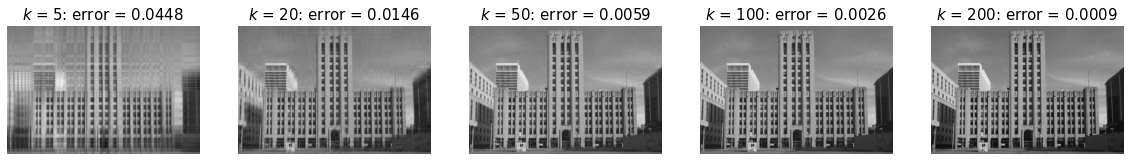

In [47]:
nrows, ncols = 1, 5
width = 4*ncols
height = 4*nrows

plt.close('all')
fig,axs=plt.subplots(nrows,ncols,figsize=(width,height)) 
for i in range(5):
    axs[i].imshow(A1[i], cmap = 'gray')
    axs[i].axis('off')
    label = '$k$ = %d: error = %.4f' %(K[i], e[K[i]])
    axs[i].set_title(label, fontsize = 15)
# with PdfPages('image_compressed.pdf') as pdf:
#     pdf.savefig(bbox_inches='tight')
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


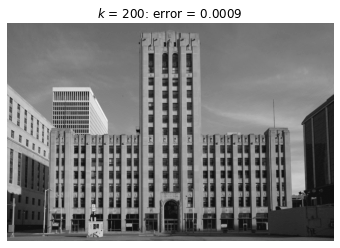

In [48]:
# show animated results
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 
fig, ax = plt.subplots()
def update(i):
    ani = plt.cla()
    ani = plt.imshow(A1[i], cmap = 'gray')
    label = '$k$ = %d: error = %.4f' %(K[i], e[K[i]])
    ax.set_xlabel(label)
    ani = plt.axis('off')
    ani = plt.title(label)
    return ani, ax 

anim = FuncAnimation(fig, update, frames=np.arange(0, len(A1)), interval=500)
anim.save('a.gif', dpi = 400, writer = 'imagemagick')
plt.show()

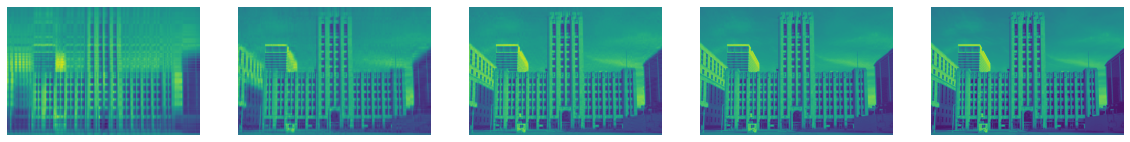

In [14]:
nrows, ncols = 1, 5
width = 4*ncols
height = 4*nrows

plt.close('all')
fig,axs=plt.subplots(nrows,ncols,figsize=(width,height)) 
for i in range(5):
    axs[i].imshow(A1[i])
    axs[i].axis('off')
    # label = '$k$ = %d: error = %.4f' %(K[i], e[K[i]])
    # axs[i].set_title(label, fontsize = 15)
# with PdfPages('image_compressed.pdf') as pdf:
#     pdf.savefig(bbox_inches='tight')
plt.show()